# Import Libraries and Load Data

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import re
from scipy import stats
import matplotlib.patches as mpatches

In [2]:
df = pd.read_csv('./car_prices.csv', on_bad_lines='skip')
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 558811 entries, 0 to 558810
Data columns (total 16 columns):
 #   Column        Non-Null Count   Dtype  
---  ------        --------------   -----  
 0   year          558811 non-null  int64  
 1   make          548510 non-null  object 
 2   model         548412 non-null  object 
 3   trim          548160 non-null  object 
 4   body          545616 non-null  object 
 5   transmission  493458 non-null  object 
 6   vin           558811 non-null  object 
 7   state         558811 non-null  object 
 8   condition     547017 non-null  float64
 9   odometer      558717 non-null  float64
 10  color         558062 non-null  object 
 11  interior      558062 non-null  object 
 12  seller        558811 non-null  object 
 13  mmr           558811 non-null  int64  
 14  sellingprice  558811 non-null  int64  
 15  saledate      558811 non-null  object 
dtypes: float64(2), int64(3), object(11)
memory usage: 68.2+ MB


# Business Insight

## Total cars by car's production year

In [3]:
# Ambil data hanya saledate tahun 2015
saledate_2015 = df[df['saledate'].str.contains('2015')]

# Agregasi
per_year =  saledate_2015.groupby('year').agg({'year':'count',
                                    'sellingprice':'mean'})
per_year.columns = ['total_cars', 'mean_selling_price']
per_year.reset_index(inplace=True)

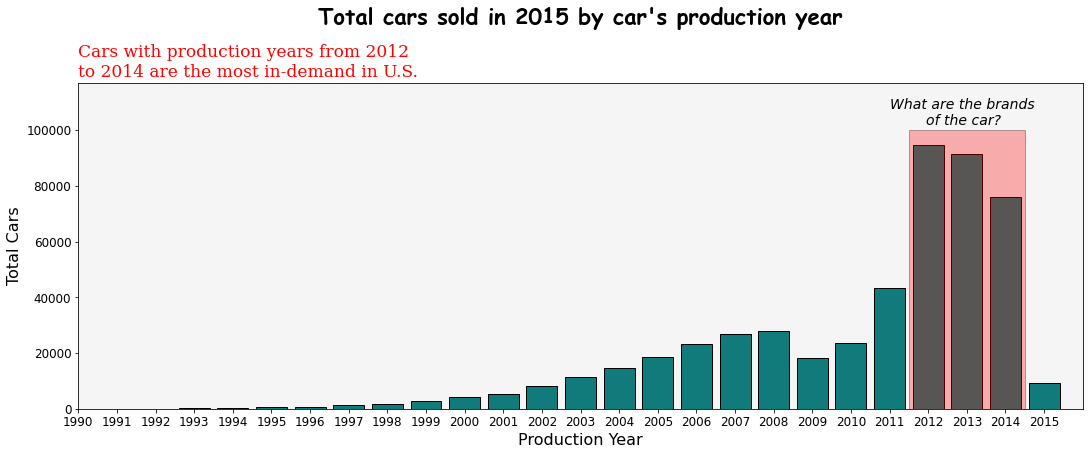

In [72]:
# plot jumlah penjualan mobil per tahun produksi
plt.figure(figsize=(18,6))

ax = sns.barplot(x='year', y='total_cars', data=per_year,
                 color='#008B8B', edgecolor='black')

ax.set_facecolor("#F5F5F5")

left, bottom, width, height = (29.5, 0, 3, 100000)
rect = mpatches.Rectangle((left,bottom),width,height, fill=True, 
                          alpha=0.3, facecolor='red', edgecolor='black')
plt.gca().add_patch(rect)

plt.title("Total cars sold in 2015 by car's production year\n\n", fontsize=22, fontweight='bold', fontname="Comic Sans MS")
plt.title("Cars with production years from 2012\nto 2014 are the most in-demand in U.S.",
          fontsize=17, family='serif', loc='left', color='red')
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)


plt.text(29, 102000, 'What are the brands\n        of the car?', fontsize=14, fontstyle='italic')


plt.xlabel('Production Year', fontsize=16)
plt.ylabel('Total Cars', fontsize=16)
plt.ylim(0, 117000)
plt.xlim(8, 34)
plt.savefig('total car sold by production year.png', dpi=300, bbox_inches = "tight")
plt.show()

## Top 5 merek mobil yang diproduksi tahun 2012-2014

In [5]:
# buat kolom make yang baru untuk memeperbaiki value yang tidak konsisten
df['make_new'] = df['make'].str.lower()

In [6]:
df['year'] = df['year'].astype(str)
df['make-year'] = df['make_new'] + '-' + df['year']

In [7]:
# Top 15 brand mobil beserta tahun produksinya yang paling laku
units_make_year = df['make-year'].value_counts().reset_index().rename(columns={'index':'make-year', 'make-year':'total_units'})[:15]

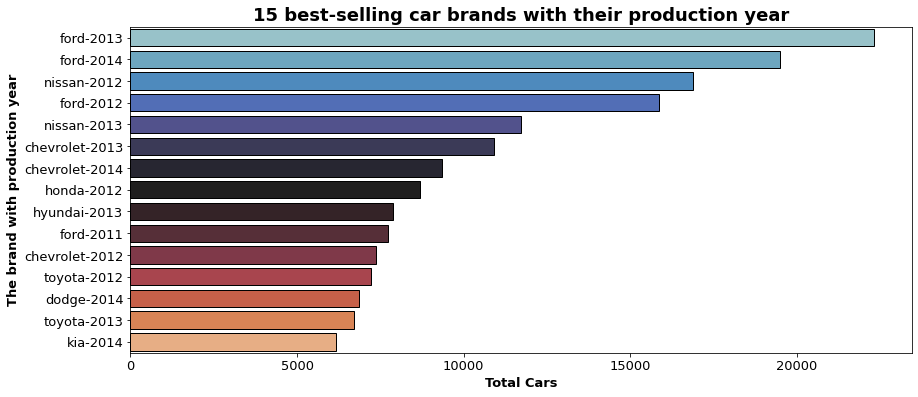

In [8]:
plt.figure(figsize=(14, 6))
ax = sns.barplot(x='total_units', y='make-year', data=units_make_year, edgecolor='black', palette = "icefire")

plt.title('15 best-selling car brands with their production year', fontsize=18, fontweight='bold')
plt.xlabel('Total Cars', fontsize=14, fontweight='bold')
plt.ylabel('The brand with production year', fontsize=14, fontweight='bold')

plt.xticks(fontsize=13)
plt.yticks(fontsize=13)

ax.xaxis.label.set_size(13)
ax.yaxis.label.set_size(13)
plt.savefig('15 best-selling car.png', dpi=500, bbox_inches = "tight")
plt.show()

## Jumlah Penjualan Mobil Weekdays

In [9]:
saledate_2015['saledate'] = saledate_2015['saledate'].apply(lambda x:re.search('(\w+\s\d{2}\s\d{4})',x).group(1))
saledate_2015['saledate'] = pd.to_datetime(saledate_2015['saledate'], format='%b %d %Y')

<ipython-input-9-652cbc6b3473>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  saledate_2015['saledate'] = saledate_2015['saledate'].apply(lambda x:re.search('(\w+\s\d{2}\s\d{4})',x).group(1))
<ipython-input-9-652cbc6b3473>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  saledate_2015['saledate'] = pd.to_datetime(saledate_2015['saledate'], format='%b %d %Y')


In [10]:
# buat kolom hari dalam seminggu dari saledate
saledate_2015["saledate_day"] = saledate_2015["saledate"].dt.day_name()
saledate_2015["saledate_day_int"] = saledate_2015["saledate"].dt.weekday

<ipython-input-10-e175d6c69ed1>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  saledate_2015["saledate_day"] = saledate_2015["saledate"].dt.day_name()
<ipython-input-10-e175d6c69ed1>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  saledate_2015["saledate_day_int"] = saledate_2015["saledate"].dt.weekday


In [11]:
# sorting from mon to sun
saledate_2015 = saledate_2015.sort_values('saledate_day_int')
saledate_2015

,year,make,model,trim,body,transmission,vin,state,condition,odometer,color,interior,seller,mmr,sellingprice,saledate,saledate_day,saledate_day_int
101028,2005,Dodge,Grand Caravan,SE,Minivan,automatic,1d4gp24r25b395733,nc,3.6,149809.0,silver,gray,crossroads nissan of hickory inc,1475,1400,2015-01-12,Monday,0
357028,2009,Chevrolet,Impala,SS,Sedan,automatic,2g1wd57c791134364,nc,3.7,61684.0,red,black,medlin buick gmc mazda,9600,9900,2015-02-23,Monday,0
510532,2007,Hyundai,Azera,SE,sedan,automatic,kmhfc46f57a211313,nc,2.6,100001.0,purple,tan,chrysler capital,5550,5500,2015-06-08,Monday,0
357023,2009,Chevrolet,Cobalt,LS,Sedan,automatic,1g1as58h897256714,nc,3.6,87713.0,white,silver,santander consumer,4425,3700,2015-03-02,Monday,0
444236,2013,Ford,Focus,SE,Sedan,automatic,1fadp3f26dl326869,nc,4.1,29246.0,red,black,primeritus remarketing/coastal fcu,10450,11400,2015-05-25,Monday,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
144013,2013,Dodge,Challenger,SXT,Coupe,automatic,2c3cdyag2dh603775,fl,4.0,26947.0,blue,black,ge fleet or gefs by apex fleet as agent,18850,19200,2015-02-01,Sunday,6
232611,2014,Chrysler,Town and Country,Touring,Minivan,automatic,2c4rc1bg4er256024,fl,4.0,18772.0,gold,black,hertz corporation/gdp,19550,20000,2015-02-01,Sunday,6
141268,2015,Chrysler,200,Limited,Sedan,automatic,1c3cccag9fn516424,fl,4.0,14671.0,white,black,pv holding inc/gdp,16800,17100,2015-02-01,Sunday,6
340911,2000,Volvo,S70,GLT SE,Sedan,automatic,yv1ls56d4y2671650,nc,2.5,121457.0,white,tan,national remarketing service,1300,1800,2015-03-08,Sunday,6


In [20]:
# Jumlah penjualan mobil per tiap haris
weekday_selling_car = saledate_2015.groupby('saledate_day_int').agg({'saledate_day':'count'}).reset_index()  
weekday_selling_car.rename(columns={'saledate_day':'total_units'}, inplace=True)
weekday_selling_car

,saledate_day_int,total_units
0,0,13625
1,1,144639
2,2,155142
3,3,136670
4,4,54883
5,5,7
6,6,118


In [31]:
weekday_selling_car['percentage'] = round(weekday_selling_car.total_units / weekday_selling_car.total_units.sum() * 100, 1)

In [32]:
# ubah weekday integer menjadi string
old = [0, 1, 2, 3, 4, 5, 6]
new = ['Mon', 'Tue', 'Wed', 'Thu', 'Fri', 'Sat', 'Sun']
weekday_selling_car.saledate_day_int = weekday_selling_car.saledate_day_int.replace(old, new)

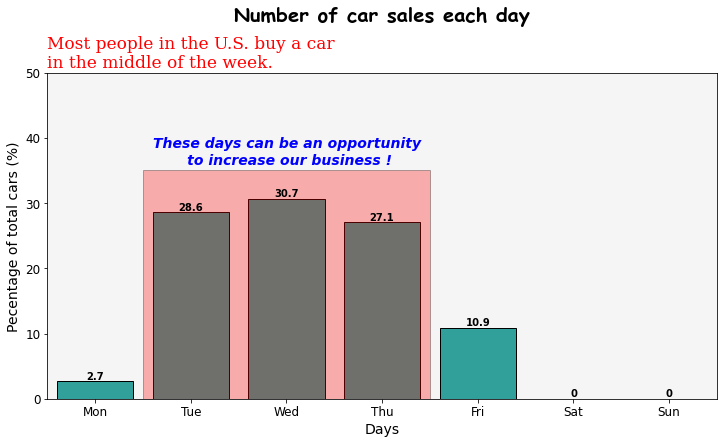

In [71]:
# Plot Jumlah penjualan mobil per tiap hari
plt.figure(figsize=(12, 6))
ax = sns.barplot(x='saledate_day_int', y='percentage', data=weekday_selling_car, edgecolor='black', color='#20B2AA',
                )

ax.set_facecolor("#F5F5F5")

plt.title('Number of car sales each day\n\n', fontsize=20, fontweight='bold', fontname="Comic Sans MS")

plt.title("Most people in the U.S. buy a car\nin the middle of the week.", pad=5,
          fontsize=17, family='serif', loc='left', color='red')

plt.xticks(fontsize=12)
plt.yticks(fontsize=12)

ax.xaxis.label.set_size(12)
ax.yaxis.label.set_size(12)

plt.xlabel('Days', fontsize=14)
plt.ylabel('Pecentage of total cars (%)', fontsize=14)
plt.ylim(0, 50)

for label in ax.containers:
    ax.bar_label(label, fontweight='bold')

left, bottom, width, height = (0.5, 0, 3, 35)
rect = mpatches.Rectangle((left,bottom),width,height, fill=True, 
                          alpha=0.3, facecolor='red', edgecolor='black')
plt.gca().add_patch(rect);

plt.text(0.6, 36, 'These days can be an opportunity\n       to increase our business !', fontsize=14, fontstyle='italic',
        color='blue', fontweight='bold')
plt.savefig('total car weekdays.png', dpi=300, bbox_inches = "tight")
plt.show()